In [1]:
# import modules
%matplotlib inline
import matplotlib as style
import matplotlib.pyplot as plt
from pandas.plotting import table
# plt.style.context('ggplot')
# plt.style.context('fivethirtyeight')
# I used two styles during this homework

In [2]:
# import modules
import os
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats

In [3]:
# import modules
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, extract

In [5]:
# connect to sqlite database
engine = create_engine("sqlite:///Flask Part/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

The date 1 year ago from the last data point in the database is August 23rd, 2016.


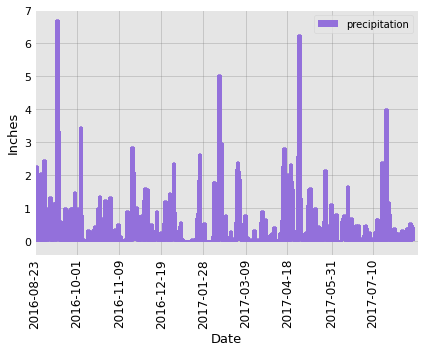

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
months = ["Indice 0", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
final_measurement_dates = []
final_measurement_prcp = []

raw_one_year_ago_date = str(dt.date(2017, 8, 23) - dt.timedelta(days=365))

final_one_year_ago_date = raw_one_year_ago_date.split("-")
print(f"The date 1 year ago from the last data point in the database is {months[int(final_one_year_ago_date[1])]} {final_one_year_ago_date[2]}rd, {final_one_year_ago_date[0]}.")

# Perform a query to retrieve the data and precipitation scores
measurement_list = session.query(Measurement).filter(Measurement.prcp != " ").\
                                              filter(Measurement.date >= raw_one_year_ago_date)

for final_measurement in measurement_list:
    final_measurement_dates.append(final_measurement.date)
    final_measurement_prcp.append(final_measurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
df_raw_measurement = pd.DataFrame({"date": final_measurement_dates,
                                   "precipitation": final_measurement_prcp})

df_intermediary_measurement = df_raw_measurement.set_index("date")

# Sort the dataframe by date
df_measurement = df_intermediary_measurement.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_measure = df_measurement.reset_index()

tickers = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28",
           "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"]
x_axis_ticks = [list(df_measure["date"]).index(tickers_location) for tickers_location in tickers]
y_axis_ticks = np.arange(0, 8, 1)

with plt.style.context('ggplot'):
    df_measure.plot.bar(color="mediumpurple", figsize=(6, 5), align="center", ylim=(-0.4, 7), width=25, xerr=7, ecolor="mediumpurple")
plt.xlabel("Date", color="black", fontsize=13)
plt.ylabel("Inches", color="black", fontsize=13)
plt.xticks(x_axis_ticks, tickers, rotation="vertical", color="black", fontsize=12)
plt.yticks(y_axis_ticks, color="black", fontsize=11)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.xlim(0, len(df_measure["date"])+27)
plt.grid(color="grey", alpha=0.3, linewidth=1)

bar_chart = os.path.join("..", "sqlalchemy-challenge", "bar chart.png")
plt.tight_layout()
plt.savefig(bar_chart)
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_measure_summary_statistics = df_measure[["precipitation"]].describe()
df_measure_summary_statistics

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


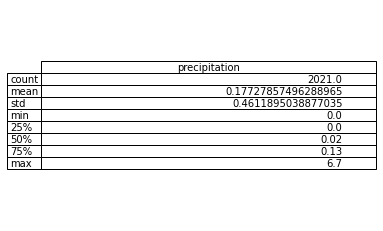

In [12]:
# Save summary statistics as png
ax = plt.subplot(111, frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False) 

table(ax, df_measure_summary_statistics, loc='center')

descriptive_dataframe_for_precipitation = os.path.join("..", "sqlalchemy-challenge", "descibe.png")
plt.savefig(descriptive_dataframe_for_precipitation)

In [13]:
# Design a query to show how many stations are available in this dataset?
measurement_station_values_list = []

station_count = session.query(Station.station).count()
measurument_station_values = session.query(Measurement.station)
for measurument_station_value in measurument_station_values:
    measurement_station_values_list.append(measurument_station_value.station)
alternative_station_count = len(Counter(measurement_station_values_list).keys())
print(f"The number of stations available in this dataset is of {station_count or alternative_station_count}.")

The number of stations available in this dataset is of 9.


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
columns = ["Station", "Station Count"]
station_query = [Measurement.station, func.count(Measurement.station)]          
raw_station_df = session.query(*station_query).\
                 group_by(Measurement.station).\
                 order_by(func.count(Measurement.station).desc()).all()

three_most_active_stations = session.query(*station_query).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.station).desc()).limit(3).all()

station_df = pd.DataFrame(raw_station_df, columns=columns)  
raw_most_active_station = station_df.loc[station_df["Station Count"] == station_df["Station Count"].max(), columns] 
most_active_station = list(raw_most_active_station["Station"])

text_in_bold = '\033[1m'
print(f"The three most active stations are the {three_most_active_stations[0][0]}, the {three_most_active_stations[1][0]} and the {three_most_active_stations[2][0]} stations.")
print(f"{text_in_bold}The most active station is the {most_active_station[0]} station.")

# List the stations and the counts in descending order.
station_df

The three most active stations are the USC00519281, the USC00519397 and the USC00513117 stations.
The most active station is the USC00519281 station.


,Station,Station Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temperature_parameters = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]   
temperature_query = session.query(*temperature_parameters).filter(Measurement.station == raw_station_df[0][0]).all()

print(f"the lowest temperature recorded for the {raw_station_df[0][0]} station is of {('{:.0f}').format(temperature_query[0][0])} degrees Fahrenheit.")
print(f"the average temperature recorded for the {raw_station_df[0][0]} station is of about {round(temperature_query[0][1], 2)} degrees Fahrenheit.")
print(f"the highest temperature recorded for the {raw_station_df[0][0]} station is of {('{:.0f}').format(temperature_query[0][2])} degrees Fahrenheit.")

the lowest temperature recorded for the USC00519281 station is of 54 degrees Fahrenheit.
the average temperature recorded for the USC00519281 station is of about 71.66 degrees Fahrenheit.
the highest temperature recorded for the USC00519281 station is of 85 degrees Fahrenheit.


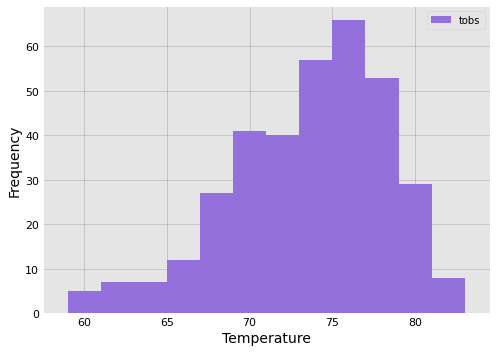

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures_list = []
highest_obeservation_number_station = session.query(Measurement).filter(Measurement.station == raw_station_df[0][0]).\
                                                                 filter(Measurement.date >= raw_one_year_ago_date).all()
                                                         
for hist in highest_obeservation_number_station:
    temperatures_list.append(hist.tobs)

frequency = np.arange(0, 80, 10)
temperature = np.arange(60, 85, 5)

plt.figure(figsize=(7, 5))
with plt.style.context('ggplot'):
    plt.hist(temperatures_list, bins=12, color="mediumpurple", label="tobs")
    plt.legend(loc="best")
plt.xlabel("Temperature", fontsize=14, color="black")
plt.ylabel("Frequency", fontsize=14, color="black")
plt.xticks(temperature, rotation=0, color="black", fontsize=11)
plt.yticks(frequency, rotation=0, color="black", fontsize=11)
plt.tick_params(axis=u'both', which=u'both',length=0)

plt.xlim(min(temperatures_list)-1.5, max(temperatures_list)+1.5)
plt.ylim(0, 69)
plt.grid(color="grey", alpha=0.3, linewidth=1)

histogram = os.path.join("..", "sqlalchemy-challenge", "histogram.png")
plt.tight_layout()
plt.savefig(histogram)
plt.show()

## Bonus Challenge Assignment

In [17]:
# Temperature Analysis 1

# Populating June and December average temperatures in a DataFrame
months = ["Indice 0", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
june_and_december_month_numbers = [months.index("June"), months.index("December")]
columns = ["Station", "Date", "Average Temperature"]
june_december_temperatures_list = []
final_june_december_temperatures_list = []

for number in june_and_december_month_numbers:
    june_december_temperatures_query = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                                                    filter(extract("month", Measurement.date) == number).all()     
    june_december_temperatures_list.append(june_december_temperatures_query)

june_december_temperatures_list[0].extend(june_december_temperatures_list[1])
final_june_december_temperatures_list = june_december_temperatures_list[0]
june_december_temperatures_df = pd.DataFrame(final_june_december_temperatures_list, columns=["Station", "Date", "Temperature"])
june_december_temperatures_df["Date"] = june_december_temperatures_df["Date"].map(lambda x: str(x)[:-3])
grouped_june_december_temperatures_df = june_december_temperatures_df.groupby(["Station", "Date"])
average_temperature = grouped_june_december_temperatures_df["Temperature"].mean()
raw_average_temperatures_df = pd.DataFrame({"Average Temperature": average_temperature})
final_average_temperatures_df = raw_average_temperatures_df.reset_index()
june_average_temperatures_df = final_average_temperatures_df[final_average_temperatures_df["Date"].str.contains("-06")]
december_average_temperatures_df = final_average_temperatures_df[final_average_temperatures_df["Date"].str.contains("-12")]
final_june_average_temperatures_df = june_average_temperatures_df.reset_index()
del final_june_average_temperatures_df["index"]
final_december_average_temperatures_df = december_average_temperatures_df.reset_index()
del final_december_average_temperatures_df["index"]
final_june_average_temperatures_df["Date"] = final_june_average_temperatures_df["Date"].map(lambda x: str(x)[:-3])
final_december_average_temperatures_df["Date"] = final_december_average_temperatures_df["Date"].map(lambda x: str(x)[:-3])
june_december_merged_df = pd.merge(final_june_average_temperatures_df, final_december_average_temperatures_df, how="left", on=["Station", "Date"])
grouped_june_december_merged_df = june_december_merged_df.groupby(["Station", "Date"])
average_temperatures_of_june = grouped_june_december_merged_df["Average Temperature_x"].unique().str[0]
average_temperatures_of_december = grouped_june_december_merged_df["Average Temperature_y"].unique().str[0]
final_june_december_average_temperatures_df = pd.DataFrame({"Average Temperatures of June": average_temperatures_of_june,
                                                            "Average Temperatures of December": average_temperatures_of_december})
final_june_december_average_temperatures_df

Average Temperatures of June  \
Station     Date                                 
USC00511918 2010                     75.620690   
            2011                     73.433333   
            2012                     75.344828   
            2013                     74.933333   
            2014                     73.964286   
...                                        ...   
USC00519523 2013                     76.241379   
            2014                     76.740741   
            2015                     77.379310   
            2016                     77.620690   
            2017                     78.896552   

                  Average Temperatures of December  
Station     Date                                    
USC00511918 2010                         70.000000  
            2011                         70.483871  
            2012                         70.566667  
            2013                         69.333333  
            2014                         68.000000  
...                                            ...  
USC00519523 2013                         72.161290  
            2014                         70.266667  
            2015                         74.037037  
            2016                         73.413793  
            2017                               NaN  

[65 rows x 2 columns]

In [18]:
# Choosing and using a t-test to compare between June and December average temperatures respective sample 
june_temperatures_list = list(june_average_temperatures_df["Average Temperature"])
december_temperatures_list = list(december_average_temperatures_df["Average Temperature"])

print("For the June and December temperatures, we are going to use an unpaired t-test because those two months respective average temperatures are independent of each other.")
print(" ")
print(stats.ttest_ind(june_temperatures_list, december_temperatures_list))
print(" ")
print("Given the very small pvalue and the quite high t-stat (statistic > 2), the difference in the means of June and December average temperatures is significant and meaningful.") 
print("Clearly, Hawaii is hotter during June than during December in general.")

For the June and December temperatures, we are going to use an unpaired t-test because those two months respective average temperatures are independent of each other.
 
Ttest_indResult(statistic=9.63349589063675, pvalue=1.2859369458004907e-16)
 
Given the very small pvalue and the quite high t-stat (statistic > 2), the difference in the means of June and December average temperatures is significant and meaningful.
Clearly, Hawaii is hotter during June than during December in general.


In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Temperature Analysis 2
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# IMPORTANT: We got our dates 366 before our trip dates instead of 365 because 2016 is a bissextile year (meaning it has 366 days instead of 365
# like the years 2004, 2008, 2012, 2020 and so on)

one_year_ago_start_date = str(dt.date(2016, 10, 9) - dt.timedelta(days=366))
one_year_ago_end_date = str(dt.date(2016, 10, 16) - dt.timedelta(days=366))

trip_period_one_year_ago = calc_temps(one_year_ago_start_date, one_year_ago_end_date)
print(f"When using the calc_temps function for the period preceding our trip period, we obtain: {trip_period_one_year_ago}")
print(" ")

print("Given that my trip start date is the October 9th, 2016 and that the end date that I chose for that trip is the October 16th, 2016, the average, minimum, and maximum")
print(f"temperatures that we had during the same period one year ago were respectively of about {round(trip_period_one_year_ago[0][1], 2)}, {('{:.0f}').format(trip_period_one_year_ago[0][0])} and {('{:.0f}').format(trip_period_one_year_ago[0][2])} degrees Fahrenheit.")

When using the calc_temps function for the period preceding our trip period, we obtain: [(71.0, 75.72413793103448, 84.0)]
 
Given that my trip start date is the October 9th, 2016 and that the end date that I chose for that trip is the October 16th, 2016, the average, minimum, and maximum
temperatures that we had during the same period one year ago were respectively of about 75.72, 71 and 84 degrees Fahrenheit.


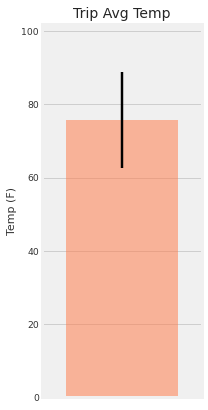

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y_axis_ticks = np.arange(0, 120, 20)
y_value = trip_period_one_year_ago[0][1]
maximum_temperature_for_y_err = trip_period_one_year_ago[0][2]
minimum_temperature_for_y_err = trip_period_one_year_ago[0][0]
y_err = maximum_temperature_for_y_err - minimum_temperature_for_y_err
empty_list = []
                                       
plt.figure(figsize=(3, 5.8))
with plt.style.context('fivethirtyeight'):
    plt.bar(0.5, y_value, color="coral", align="center", width=0.7, alpha=0.55)
plt.errorbar(0.5, y_value, yerr=y_err, elinewidth=2.45, ecolor="black")
plt.title("Trip Avg Temp", alpha=0.85, fontsize=14)
plt.ylabel("Temp (F)", color="black", alpha=0.8, fontsize=11)
plt.yticks(y_axis_ticks, color="black", alpha=0.8, fontsize=9.3)
plt.xticks(ticks=empty_list)
plt.grid(color="grey", alpha=0.3, linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 102)

temperature_bar_chart = os.path.join("..", "sqlalchemy-challenge", "temperature bar chart.png")
plt.tight_layout()
plt.savefig(temperature_bar_chart)
plt.show()

In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
columns = ["Station", "Date", "Precipitation Amount", "Name", "Latitude", "Longitude", "Elevation"]

Measurument_Station_merged_list = [Measurement.station, Measurement.date, Measurement.prcp, Station.name, Station.latitude, Station.longitude,                                                    Station.elevation]
Measurement_Station_Query = session.query(*Measurument_Station_merged_list).filter(Measurement.station == Station.station).\
                                                                            filter(Measurement.date >= one_year_ago_start_date).\
                                                                            filter(Measurement.date <= one_year_ago_end_date).all()

raw_Measurement_Station_df = pd.DataFrame(Measurement_Station_Query, columns=columns)
Measurement_Station_df = raw_Measurement_Station_df.dropna()
grouped_Measurement_Station_df = Measurement_Station_df.groupby("Station")
precipation_amount_sum_per_station = grouped_Measurement_Station_df["Precipitation Amount"].sum()
station_name = grouped_Measurement_Station_df["Name"].unique().str[0]
station_latitude = grouped_Measurement_Station_df["Latitude"].unique().str[0]
station_longitude = grouped_Measurement_Station_df["Longitude"].unique().str[0]
station_elevation = grouped_Measurement_Station_df["Elevation"].unique().str[0]
raw_Measurement_Station_per_station = pd.DataFrame({"Total Percipiation Amount": precipation_amount_sum_per_station,
                                                    "Name": station_name,
                                                    "Latitude": station_latitude,
                                                    "Longitude": station_longitude,
                                                    "Elevation": station_elevation})

intermediary_Measurement_Station_per_station = raw_Measurement_Station_per_station.reset_index()
Measurement_Station_per_station = intermediary_Measurement_Station_per_station.sort_values("Total Percipiation Amount", ascending=False)

Measurement_Station_per_station

,Station,Total Percipiation Amount,Name,Latitude,Longitude,Elevation
2,USC00514830,8.90,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
1,USC00513117,5.68,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
5,USC00519281,5.52,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00519523,5.09,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
3,USC00516128,3.00,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
0,USC00511918,0.40,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
6,USC00519397,0.09,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
4,USC00518838,0.00,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6


In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
print("My trip start date is the October 9th, 2016 and the end date that I chose for that trip is the October 16th, 2016")

# Use the start and end date to create a range of dates
all_dates_query = session.query(Measurement.date).filter(Measurement.date >= one_year_ago_start_date).\
                                            filter(Measurement.date <= one_year_ago_end_date).all()

range_of_dates = list(np.unique(all_dates_query))

# Stip off the year and save a list of %m-%d strings
final_month_and_days_list = [range_of_dates[x][5:] for x in (range(0, len(range_of_dates)))]

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(y) for y in final_month_and_days_list]

My trip start date is the October 9th, 2016 and the end date that I chose for that trip is the October 16th, 2016


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
minimum_temperature = [normals[x][0][0] for x in range(0, len(normals))]
average_temperature = [normals[x][0][1] for x in range(0, len(normals))]
maximum_temperature = [normals[x][0][2] for x in range(0, len(normals))]
raw_daily_normals_df = pd.DataFrame({"dates": range_of_dates,
                                     "daily normals dates": final_month_and_days_list,
                                     "tmin": minimum_temperature,
                                     "tavg": average_temperature,
                                     "tmax": maximum_temperature})

daily_normals_df = raw_daily_normals_df.set_index("dates")

daily_normals_df

,daily normals dates,tmin,tavg,tmax
dates,,,,
2015-10-09,10-09,69.0,76.113636,84.0
2015-10-10,10-10,69.0,75.854167,83.0
2015-10-11,10-11,69.0,76.571429,84.0
2015-10-12,10-12,65.0,75.755102,82.0
2015-10-13,10-13,65.0,75.980392,84.0
2015-10-14,10-14,67.0,75.192308,82.0
2015-10-15,10-15,67.0,75.634615,82.0
2015-10-16,10-16,67.0,75.591837,81.0


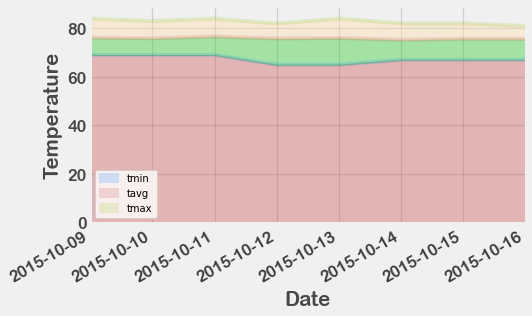

In [26]:
# Plot the daily normals as an area plot with `stacked=False`
raw_area_plot_df = daily_normals_df
intermediary_area_plot_df = raw_area_plot_df.reset_index()
final_area_plot_df = intermediary_area_plot_df.drop(columns="daily normals dates")

x_axis_ticks = np.arange(len(range_of_dates))
ticker_locations = [value for value in x_axis_ticks]
y_axis_ticks = np.arange(0, 100, 20)

with plt.style.context('fivethirtyeight'):
    final_area_plot_df.plot(color=["dodgerblue", "indianred", "yellowgreen"], stacked=False, figsize=(7.5, 4.5), linewidth=4, alpha=0.2)
plt.xlabel("Date", fontsize=20.5, color="black", fontname="Arial Rounded MT Bold", alpha=0.7)
plt.ylabel("Temperature", fontsize=20.5, color="black", fontname="Arial Rounded MT Bold", alpha=0.7)
plt.xticks(ticker_locations, range_of_dates, rotation=30, ha="right", fontsize=16, color="black", fontname="Arial Rounded MT Bold", alpha=0.75)
plt.tick_params(axis="x", pad=6)
plt.yticks(y_axis_ticks, color="black", fontsize=16.3, fontname="Arial Rounded MT Bold", alpha=0.7)

plt.xlim(0, 7)
plt.ylim(0, max(maximum_temperature)+5)
plt.grid(color="grey", alpha=0.3, linewidth=1.2)

plt.fill_between(x_axis_ticks, minimum_temperature, color="indianred", alpha=0.4)
plt.fill_between(x_axis_ticks, minimum_temperature, average_temperature, color="limegreen", alpha=0.4)
plt.fill_between(x_axis_ticks, average_temperature, maximum_temperature, color="navajowhite", alpha=0.4)

leg = plt.legend()
for line in leg.get_lines():
    line.set_linewidth(10)

area_plot = os.path.join("..", "sqlalchemy-challenge", "area_plot.png")
plt.tight_layout()
plt.savefig(area_plot)
plt.show()